Test a trained object detector

In [1]:
import time
from matplotlib import pyplot as plt
import numpy as np
import mxnet as mx
from mxnet import autograd, gluon
import gluoncv as gcv
from gluoncv.utils import viz
from gluoncv.data import VOCDetection
from gluoncv.data.batchify import Tuple, Stack, Pad
from gluoncv.data.transforms.presets.ssd import SSDDefaultTrainTransform

In [2]:
class VOCLike(VOCDetection):
    CLASSES = ['orange_roughy_edge', 'orange_roughy', 'sea_anemone', 'sea_urchin', 'oreo', 'whiptail', 'eel', 'shark', 'worm', 'misc_fish', 'mollusc', 'shrimp', 'sea_star']
    #CLASSES = ['person','dog']
    def __init__(self, root, splits, transform=None, index_map=None, preload_label=True):
        super(VOCLike, self).__init__(root, splits, transform, index_map, preload_label)

Load the net parameters from file

In [3]:
# input the class names
classes = ['orange_roughy_edge', 'orange_roughy', 'sea_anemone', 'sea_urchin', 'oreo', 'whiptail', 'eel', 'shark', 'worm', 'misc_fish', 'mollusc', 'shrimp', 'sea_star']

net = gcv.model_zoo.get_model('ssd_512_mobilenet1.0_custom', classes=classes, pretrained_base=False)
net.load_parameters('clf-outputs/051520-ssd_512_mobilenet1.0_roughy.params')

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/mxnet/gluon/block.py:1454: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [10]:
# high density image
#x, img = gcv.data.transforms.presets.ssd.load_test('test-imgs/VOC2018/JPEGImages/20190715-015011-230.jpg', 512)

# low density image
x, img = gcv.data.transforms.presets.ssd.load_test('test-imgs/VOC2018/JPEGImages/20190715-014849-259.jpg', 512)
#x, img = gcv.data.transforms.presets.ssd.load_test('test-imgs/VOC2018/JPEGImages/220190715-014609-287.jpg', 512)

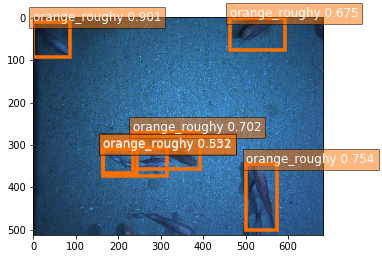

In [14]:
cid, score, bbox = net(x)
ax = viz.plot_bbox(img, bbox[0], score[0], cid[0], class_names=classes)
plt.show()

In [12]:
print(score[0])


[[ 0.9005912 ]
 [ 0.8514826 ]
 [ 0.7544861 ]
 [ 0.70203805]
 [ 0.6747931 ]
 [ 0.5323914 ]
 [ 0.41281494]
 [ 0.35478246]
 [ 0.26712286]
 [ 0.18622828]
 [ 0.15716797]
 [ 0.14973219]
 [ 0.14900255]
 [ 0.1418392 ]
 [ 0.13110504]
 [ 0.1275969 ]
 [ 0.1265239 ]
 [ 0.12649381]
 [ 0.12509684]
 [ 0.12242118]
 [ 0.1216014 ]
 [ 0.11928027]
 [ 0.11643477]
 [ 0.11626147]
 [ 0.11540272]
 [ 0.11340696]
 [ 0.11255224]
 [ 0.11244411]
 [ 0.11239134]
 [ 0.1117615 ]
 [ 0.10777665]
 [ 0.10752099]
 [ 0.10496934]
 [ 0.10302866]
 [ 0.0979289 ]
 [ 0.09693898]
 [ 0.09321106]
 [ 0.0930046 ]
 [ 0.09266298]
 [ 0.09257989]
 [ 0.09200205]
 [ 0.09116165]
 [ 0.09113446]
 [ 0.0901862 ]
 [ 0.08998122]
 [ 0.08952539]
 [ 0.08909895]
 [ 0.0884651 ]
 [ 0.08691413]
 [ 0.08660135]
 [ 0.08627816]
 [ 0.08501071]
 [ 0.08446001]
 [ 0.08305342]
 [ 0.08264521]
 [ 0.08108645]
 [ 0.0808371 ]
 [ 0.08070752]
 [ 0.08035615]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.        ]
 [-1.    

port/20190715-015011-230.jpg -- gt: 29 ROIs || starboard/20190715-015011-230.jpg --pred: 55 ROIs 
port/20190715-014849-259.jpg -- gt: 7 ROIs  || starboard/20190715-014849-259.jpg -- pred: 7 ROIs [got 3 in middle, mislabeled edge cases]

In [24]:
import glob, os
test = glob.glob(os.path.join('test-imgs/VOC2018/JPEGImages','*.jpg'))

In [41]:
test.sort()
test[69]

'test-imgs/VOC2018/JPEGImages/20190715-014849-259.jpg'

In [44]:
test_dataset = VOCLike(root='test-imgs', splits=((2018, 'train'),))

label: [[1.155e+03 1.286e+03 1.889e+03 1.722e+03 1.000e+00 0.000e+00]
 [8.270e+02 1.483e+03 1.594e+03 1.853e+03 1.000e+00 0.000e+00]
 [2.437e+03 1.653e+03 2.817e+03 2.458e+03 1.000e+00 0.000e+00]
 [0.000e+00 6.000e+00 4.500e+02 4.500e+02 0.000e+00 0.000e+00]
 [1.048e+03 2.181e+03 1.884e+03 2.471e+03 0.000e+00 0.000e+00]
 [9.480e+02 2.337e+03 1.158e+03 2.471e+03 0.000e+00 0.000e+00]
 [2.307e+03 0.000e+00 2.881e+03 3.010e+02 0.000e+00 0.000e+00]]


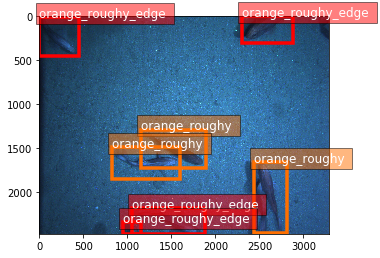

In [45]:
classes = ['orange_roughy_edge', 'orange_roughy', 'sea_anemone', 'sea_urchin', 'oreo', 'whiptail', 'eel', 'shark', 'worm', 'misc_fish', 'mollusc', 'shrimp', 'sea_star']
image, label = test_dataset[69]
print('label:', label)

# display image and label
ax = viz.plot_bbox(image, bboxes=label[:, :4], labels=label[:, 4:5], class_names=classes)
plt.show()